In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("G:/Datasets/heart.csv")

In [72]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [73]:
print(data.corr()['target'].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


C:\Users\CoBra\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1280: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data


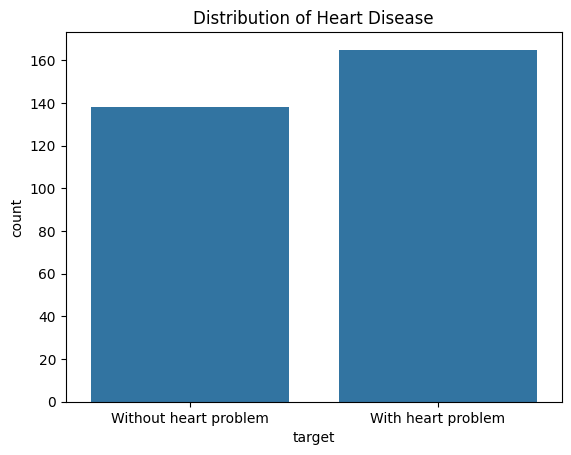

In [74]:
y=data['target']

temp_target=data['target'].value_counts()
sns.barplot(temp_target)
plt.title("Distribution of Heart Disease")
plt.xticks([0,1],["Without heart problem","With heart problem"])
plt.show()

In [75]:
print("Percentage of people dont have heart problem=",round(temp_target[0]*100/303,2),"%")
print("Percentage of people with heart problem=",round(temp_target[1]*100/303,2),"%")

Percentage of people dont have heart problem= 45.54 %
Percentage of people with heart problem= 54.46 %


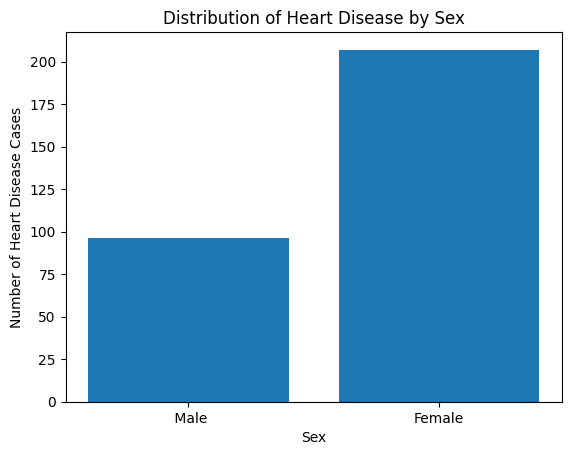

In [76]:
sex_counts = data.groupby('sex')['target'].count()

plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel('Sex')
plt.ylabel('Number of Heart Disease Cases')
plt.title('Distribution of Heart Disease by Sex')
plt.xticks([0, 1], [' Male', 'Female'])  
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

In [79]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [80]:
Lr=LogisticRegression()
Lr.fit(X_train,Y_train)
Y_pred_lr=Lr.predict(X_test)
result_df=pd.DataFrame({"ACTUAL Y = ":Y_test,"PREDICTED Y = ":Y_pred_lr})
print(result_df)
score_lr=round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("ACCURECY SCORE OF LOGISTIC REGRESSION IS = ",score_lr,"%")

     ACTUAL Y =   PREDICTED Y = 
204            0               0
159            1               1
219            0               0
174            0               0
184            0               0
..           ...             ...
0              1               1
288            0               0
259            0               1
179            0               0
110            1               1

[61 rows x 2 columns]
ACCURECY SCORE OF LOGISTIC REGRESSION IS =  77.05 %


C:\Users\CoBra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb=nb.predict(X_test)
result_df=pd.DataFrame({"ACTUAL Y = ":Y_test,"PREDICTED Y = ":Y_pred_nb})
print(result_df)
score_nb=round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("ACCURECY SCORE OF NAIVE BAYES IS = ",score_nb,"%")

     ACTUAL Y =   PREDICTED Y = 
204            0               0
159            1               1
219            0               0
174            0               0
184            0               0
..           ...             ...
0              1               0
288            0               0
259            0               0
179            0               0
110            1               0

[61 rows x 2 columns]
ACCURECY SCORE OF NAIVE BAYES IS =  77.05 %


In [82]:
from sklearn import svm
sv=svm.SVC(kernel="linear")
sv.fit(X_train,Y_train)
Y_pred_sv=sv.predict(X_test)
result_df=pd.DataFrame({"ACTUAL Y = ":Y_test,"PREDICTED Y = ":Y_pred_sv})
print(result_df)
score_sv=round(accuracy_score(Y_pred_sv,Y_test)*100,2)
print("ACCURECY SCORE OF SVM IS = ",score_sv,"%")

     ACTUAL Y =   PREDICTED Y = 
204            0               0
159            1               1
219            0               0
174            0               0
184            0               0
..           ...             ...
0              1               1
288            0               0
259            0               1
179            0               0
110            1               1

[61 rows x 2 columns]
ACCURECY SCORE OF SVM IS =  73.77 %


In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_test,Y_test)
Y_pred_knn=knn.predict(X_test)
result_df=pd.DataFrame({"ACTUAL Y = ":Y_test,"PREDICTED Y = ":Y_pred_knn})
print(result_df)
score_knn=round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("ACCURECY SCORE OF KNN IS = ",score_knn,"%")

     ACTUAL Y =   PREDICTED Y = 
204            0               0
159            1               1
219            0               1
174            0               0
184            0               1
..           ...             ...
0              1               1
288            0               0
259            0               0
179            0               0
110            1               0

[61 rows x 2 columns]
ACCURECY SCORE OF KNN IS =  73.77 %


     ACTUAL Y =   PREDICTED Y = 
204            0               0
159            1               1
219            0               0
174            0               0
184            0               1
..           ...             ...
0              1               0
288            0               0
259            0               1
179            0               0
110            1               0

[61 rows x 2 columns]
[[22  8]
 [ 9 22]]
ACCURECY SCORE OF DECISION TREE IS =  72.13 %


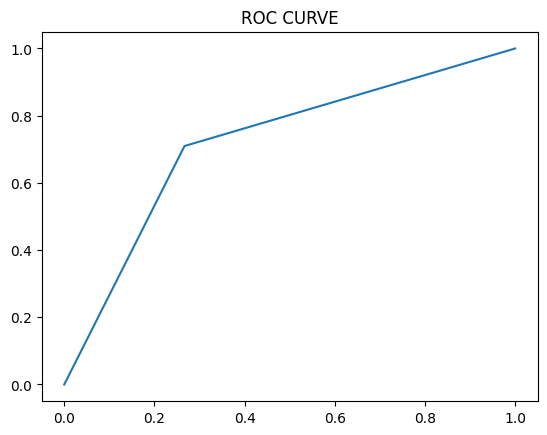

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,Y_train)
Y_pred_dtc=dtc.predict(X_test)
result_df=pd.DataFrame({"ACTUAL Y = ":Y_test,"PREDICTED Y = ":Y_pred_dtc})
print(result_df)
cm=confusion_matrix(Y_test,Y_pred_dtc)
print(cm)
score_dtc=round(accuracy_score(Y_pred_dtc,Y_test)*100,2)
print("ACCURECY SCORE OF DECISION TREE IS = ",score_dtc,"%")
# print("F1_SCORE OF DECISION TREE IS =",round(metrics.f1_score(Y_test, Y_pred_dtc)*100,2))
# print(" RECALL_SCORE OF DECISION TREE IS =",round(metrics.recall_score(Y_test, Y_pred_dtc)*100,2))

fpr,tpr,thershold=metrics.roc_curve(Y_test,Y_pred_dtc)
plt.plot(fpr,tpr)
plt.title("ROC CURVE")
plt.show()


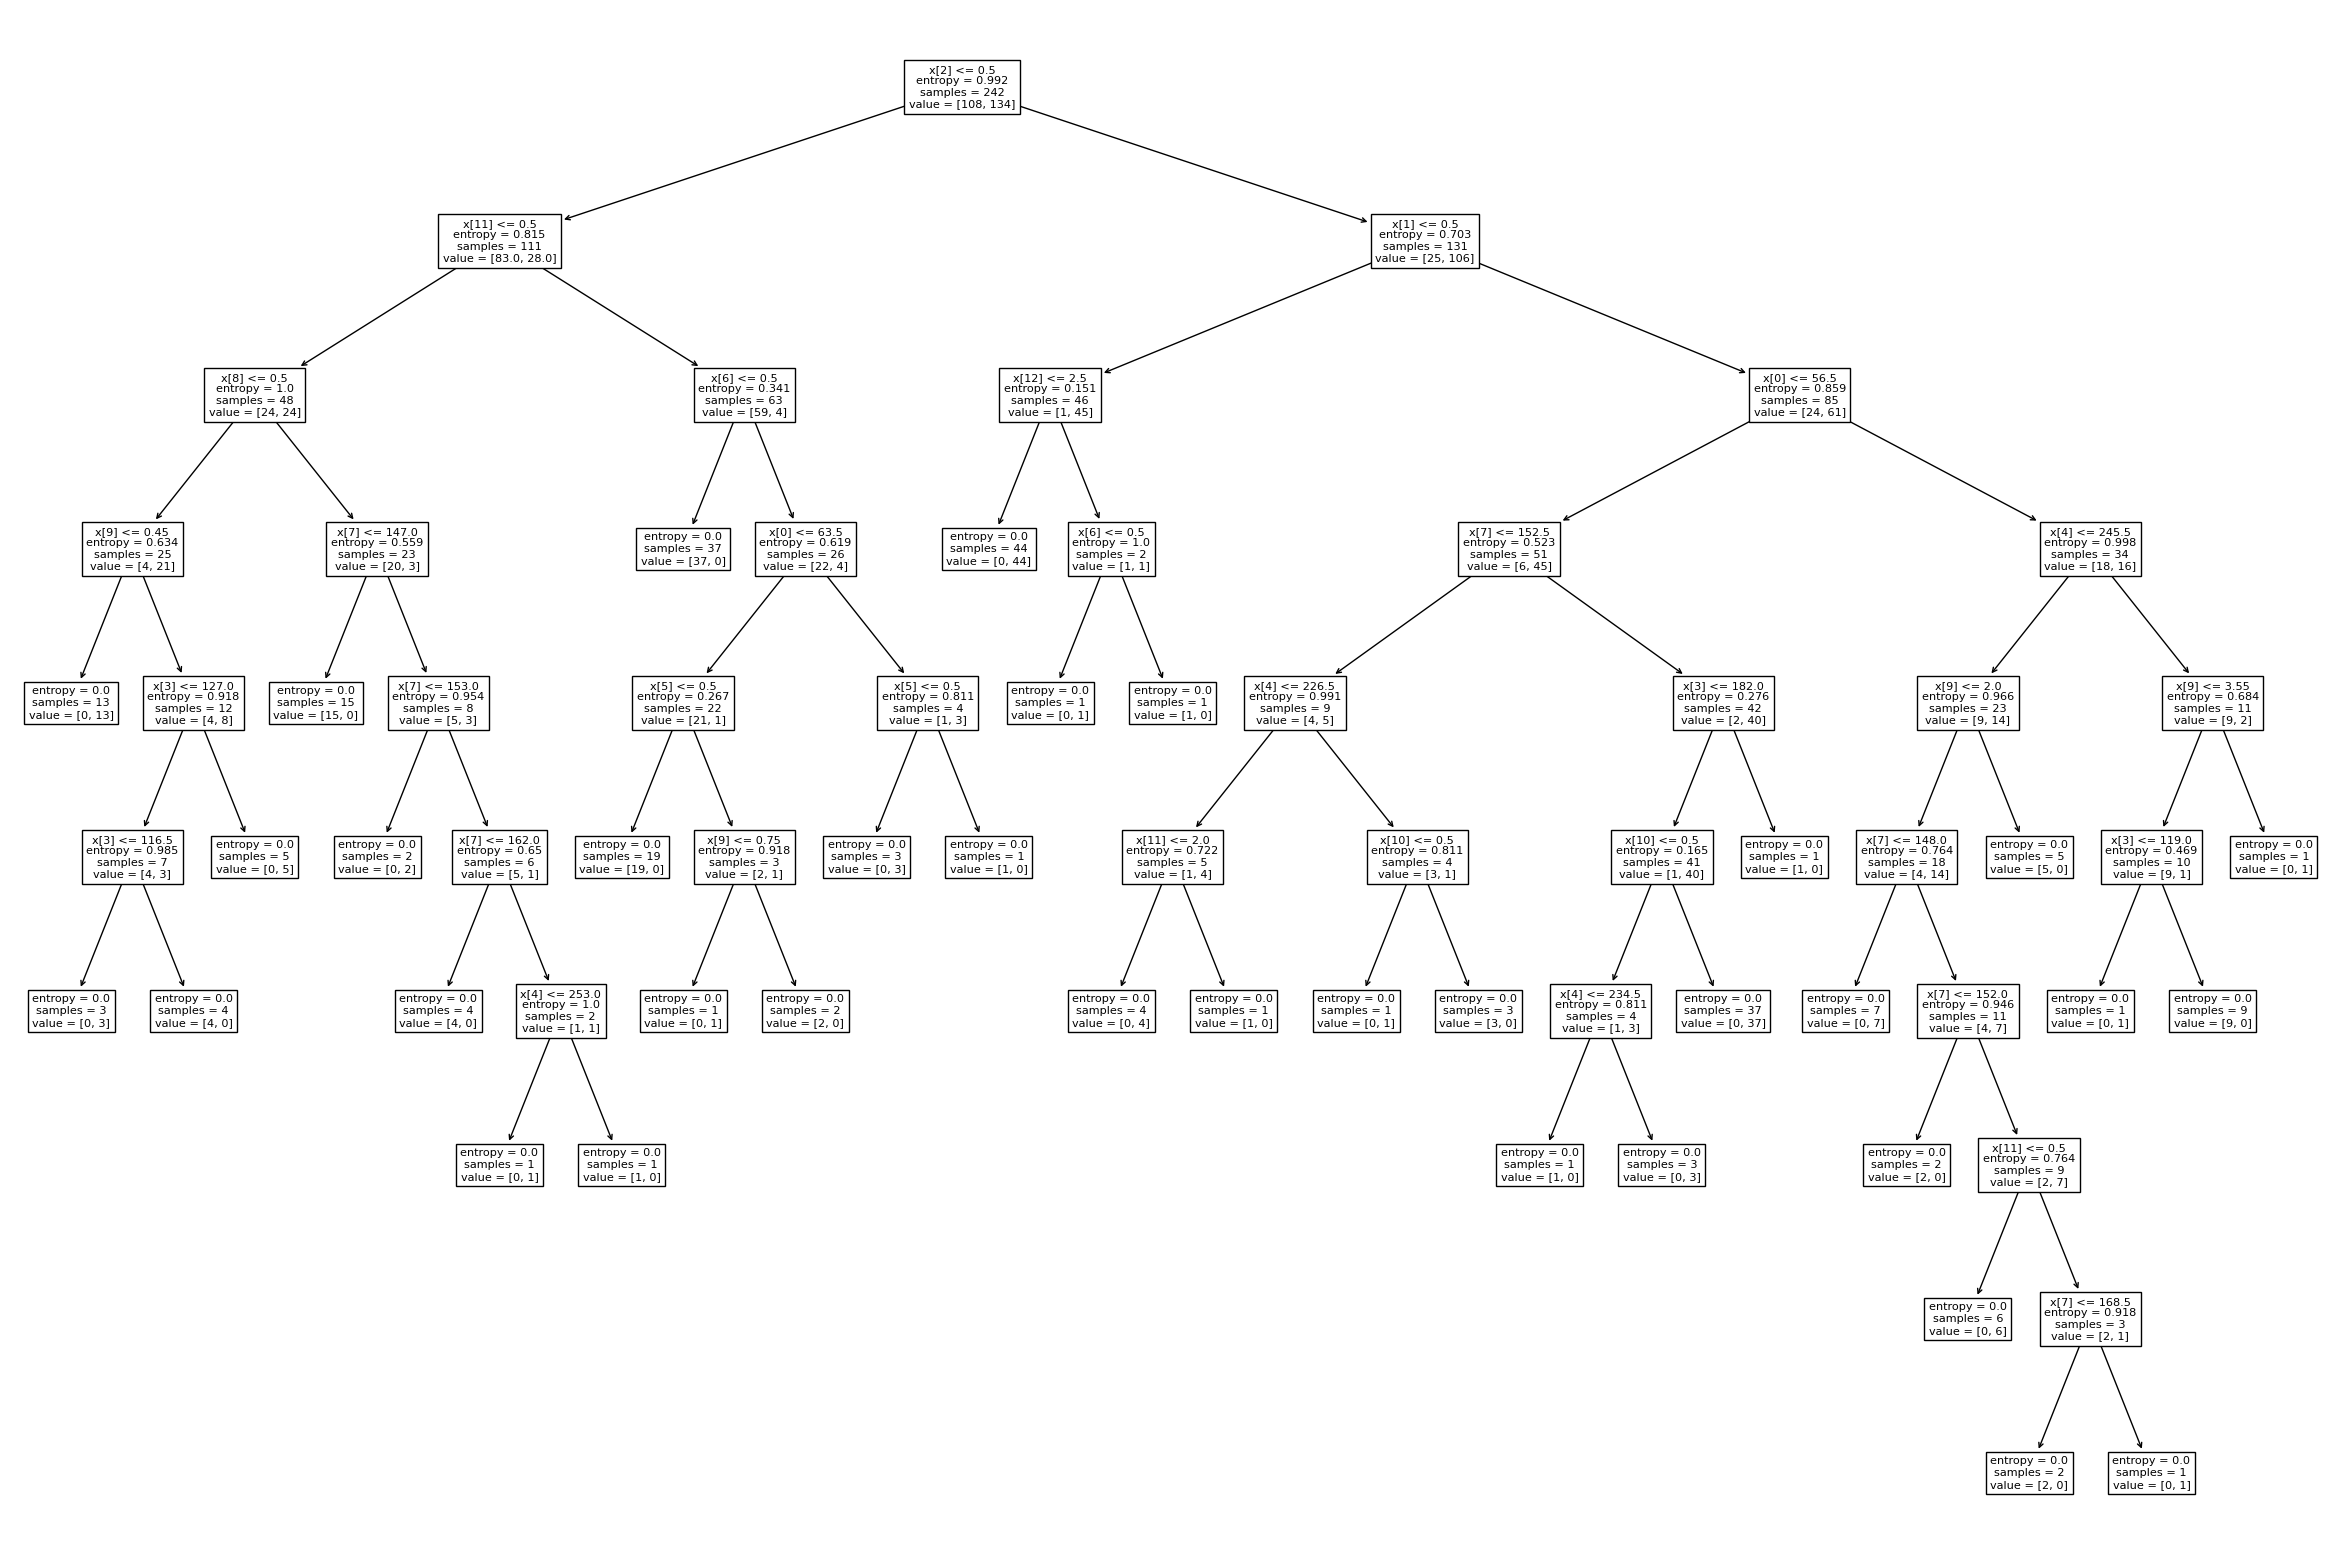

In [85]:
from sklearn import  tree
fig = plt.figure(figsize=(30,20))
_= tree.plot_tree(dtc)
plt.show()

In [86]:
tree_form = tree.export_text(dtc)
print(tree_form)

|--- feature_2 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_9 <= 0.45
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  0.45
|   |   |   |   |--- feature_3 <= 127.00
|   |   |   |   |   |--- feature_3 <= 116.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  116.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  127.00
|   |   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_7 <= 147.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  147.00
|   |   |   |   |--- feature_7 <= 153.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  153.00
|   |   |   |   |   |--- feature_7 <= 162.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  162.00
|   |   |   |   |   |   |--- feature_4 <= 253.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  253.00
|   |   |   |   |

In [90]:
from sklearn.ensemble import RandomForestClassifier


max_accuracy=0
for x in range(1000):
    rfc=RandomForestClassifier(random_state=x)
    rfc.fit(X_train,Y_train)
    Y_pred_rfc=rfc.predict(X_test)
    current_accuracy=round(accuracy_score(Y_pred_rfc,Y_test)*100,2)
    if (current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        best_x=x

rf=RandomForestClassifier(n_estimators=best_x,criterion="entropy")
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)

result_df=pd.DataFrame({"ACTUAL Y ":Y_test,"PREDICTED Y ":Y_pred_rf})
print(result_df)
cm=confusion_matrix(Y_test,Y_pred_rf)
print(cm)
score_rf=round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("ACCURECY SCORE OF RANDOM FOREST IS = ",score_rf,"%")
# print("F1_SCORE OF RANDOM FORES IS =",round(metrics.f1_score(Y_test, Y_pred_rfc)*100,2))
# print("RECALL_SCORE OF RANDOM FORES IS =",round(metrics.recall_score(Y_test, Y_pred_rfc)*100,2))


     ACTUAL Y   PREDICTED Y 
204          0             0
159          1             1
219          0             0
174          0             0
184          0             0
..         ...           ...
0            1             1
288          0             0
259          0             1
179          0             0
110          1             0

[61 rows x 2 columns]
[[21  9]
 [ 3 28]]
ACCURECY SCORE OF RANDOM FOREST IS =  80.33 %


In [91]:
scores=[score_lr,score_nb,score_sv,score_knn,score_sv,score_rf]
algorithm=["Linear Regression","Navie Bayes","Support Vector Machine","K-nearest Neighbor","Decision Tree","Random Forest"]

for i in range(len(algorithm)):
    print("The Acuuracy achived using ",algorithm[i], "is",scores[i],"%")

The Acuuracy achived using  Linear Regression is 77.05 %
The Acuuracy achived using  Navie Bayes is 77.05 %
The Acuuracy achived using  Support Vector Machine is 73.77 %
The Acuuracy achived using  K-nearest Neighbor is 73.77 %
The Acuuracy achived using  Decision Tree is 73.77 %
The Acuuracy achived using  Random Forest is 80.33 %


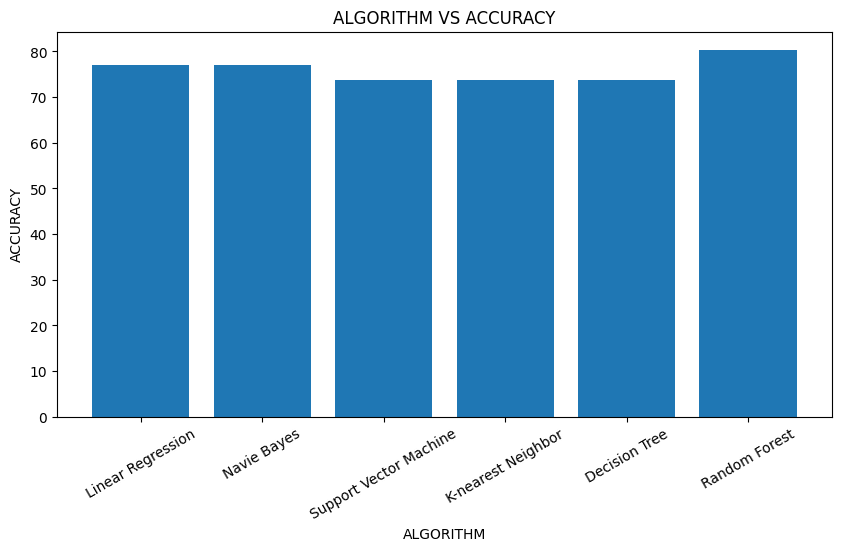

In [92]:
plt.figure(figsize=(10,5))
plt.bar(algorithm,scores)
plt.xlabel("ALGORITHM")
plt.xticks(rotation=30)
plt.ylabel("ACCURACY")
plt.title("ALGORITHM VS ACCURACY")
plt.show()